In [1]:
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 40)
pd.set_option('display.width', 1000)

# Create Datasets

## Spotify Master > Data

### Import Data & Clean DataFrame

In [2]:
# Read csv to dataframe
data = pd.read_csv('Data/master.csv')

# Drop feature columns
data.drop(columns=['Unnamed: 0',
                   'track_duration_ms',
                   'track_track_number',
                   'track_album_total_tracks',
                   'track_album_available_markets',
                   'track_album_name',
                   'track_explicit',
                   'track_album_id',
                   'track_album_available_markets_count',
                   'track_album_single',
                   'key',
                   'mode',
                   'time_signature'
                   ], inplace=True)

# Re-order columns
data = data[['track_id',
             'track_name',
             'artist_id',
             'artist_name',
             'artist_genres',
             'artist_followers',
             'artist_popularity',
             'track_popularity',
             'track_album_release_date',
             'acousticness',
             'danceability',
             'duration_ms',
             'energy',
             'instrumentalness',
             'liveness',
             'loudness',
             'speechiness',
             'tempo',
             'valence'
            ]]

In [3]:
# Preivew dataframe
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408702 entries, 0 to 2408701
Data columns (total 19 columns):
track_id                    object
track_name                  object
artist_id                   object
artist_name                 object
artist_genres               object
artist_followers            float64
artist_popularity           float64
track_popularity            float64
track_album_release_date    object
acousticness                float64
danceability                float64
duration_ms                 float64
energy                      float64
instrumentalness            float64
liveness                    float64
loudness                    float64
speechiness                 float64
tempo                       float64
valence                     float64
dtypes: float64(13), object(6)
memory usage: 349.2+ MB
None


,track_id,track_name,artist_id,artist_name,artist_genres,artist_followers,artist_popularity,track_popularity,track_album_release_date,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0001ETU9DQ1EDGwQODbyLP,Saturn,4Mf2Y2nSSWsNLSgxvAhTIj,Luke Cole,"['brain waves', 'pianissimo']",169.0,27.0,26.0,2017-05-26,0.7270,0.177,100523.0,0.275,0.000000,0.141,-12.961,0.0401,114.181,0.0351
1,0001px4jtydNsUqu1oRgkT,Mississipi,52WV9rEqSP9z9fcxeywOtz,The Sparks,['indorock'],937.0,23.0,7.0,2009-06-01,0.0788,0.622,162773.0,0.911,0.832000,0.242,-4.421,0.0340,135.523,0.6550
2,000254o6oXjLDip6sUPHcL,I Will Run,5D0WwKVD3KVdOnMZJLTo96,One Call,[],846.0,3.0,0.0,2009-05-01,0.6610,0.550,394720.0,0.415,0.000015,0.171,-9.211,0.0253,145.992,0.2310
3,0003vV1RhR0OHyTfrrIHyd,Gospel Medley - I've Got My Mind Made Up - I'v...,1Lkx061Y0k6Szk3Ee0KI2V,Joy Lapps,[],55.0,2.0,1.0,2006-04-07,0.4940,0.623,378880.0,0.542,0.327000,0.111,-9.374,0.0412,84.074,0.6080
4,0004AYxyqRFP0GC8ZZO2lG,Maghimagsik - Mocksmile Remix,4I1iKyF3JdZ8sR9RHdGFfJ,BLKD,"['pinoy alternative rap', 'pinoy hip hop']",1837.0,23.0,14.0,2019-03-27,0.4180,0.739,177981.0,0.445,0.001370,0.105,-12.608,0.2240,174.105,0.3810


### Feature Engineering: "track_release_year"

In [4]:
# Extract year from date string
data['track_album_release_date'] = data['track_album_release_date'].str[0:4]

# Rename column
data.rename(columns={'track_album_release_date': 'track_release_year'}, inplace=True)

# Change type string to float
data['track_release_year'] = data['track_release_year'].astype(float)

# Drop 3,427 songs before 1920
data = data[data['track_release_year'] >= 1920]

### Feature Engineering: "artist_genres"

In [5]:
#Take brackets out of artist_genres column string data
data['artist_genres'] = data['artist_genres'].str[1:-1]

#Take quotes out of artist_genres column string data
data['artist_genres'] = data['artist_genres'].str.replace("'", "")

#Take spaces out of artist_genres column string data
#data['artist_genres'] = data['artist_genres'].str.replace(" ", "")

#Take dashes out of artist_genres column string data
#data['artist_genres'] = data['artist_genres'].str.replace("-", "")

#Replace empty genre data points with NaNs
data['artist_genres'] = data['artist_genres'].apply(lambda y: 'not assigned' if y=='' else y)

### Export to CSV

In [6]:
# Preivew dataframe
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2405275 entries, 0 to 2408701
Data columns (total 19 columns):
track_id              object
track_name            object
artist_id             object
artist_name           object
artist_genres         object
artist_followers      float64
artist_popularity     float64
track_popularity      float64
track_release_year    float64
acousticness          float64
danceability          float64
duration_ms           float64
energy                float64
instrumentalness      float64
liveness              float64
loudness              float64
speechiness           float64
tempo                 float64
valence               float64
dtypes: float64(14), object(5)
memory usage: 367.0+ MB
None


,track_id,track_name,artist_id,artist_name,artist_genres,artist_followers,artist_popularity,track_popularity,track_release_year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0001ETU9DQ1EDGwQODbyLP,Saturn,4Mf2Y2nSSWsNLSgxvAhTIj,Luke Cole,"brain waves, pianissimo",169.0,27.0,26.0,2017.0,0.7270,0.177,100523.0,0.275,0.000000,0.141,-12.961,0.0401,114.181,0.0351
1,0001px4jtydNsUqu1oRgkT,Mississipi,52WV9rEqSP9z9fcxeywOtz,The Sparks,indorock,937.0,23.0,7.0,2009.0,0.0788,0.622,162773.0,0.911,0.832000,0.242,-4.421,0.0340,135.523,0.6550
2,000254o6oXjLDip6sUPHcL,I Will Run,5D0WwKVD3KVdOnMZJLTo96,One Call,not assigned,846.0,3.0,0.0,2009.0,0.6610,0.550,394720.0,0.415,0.000015,0.171,-9.211,0.0253,145.992,0.2310
3,0003vV1RhR0OHyTfrrIHyd,Gospel Medley - I've Got My Mind Made Up - I'v...,1Lkx061Y0k6Szk3Ee0KI2V,Joy Lapps,not assigned,55.0,2.0,1.0,2006.0,0.4940,0.623,378880.0,0.542,0.327000,0.111,-9.374,0.0412,84.074,0.6080
4,0004AYxyqRFP0GC8ZZO2lG,Maghimagsik - Mocksmile Remix,4I1iKyF3JdZ8sR9RHdGFfJ,BLKD,"pinoy alternative rap, pinoy hip hop",1837.0,23.0,14.0,2019.0,0.4180,0.739,177981.0,0.445,0.001370,0.105,-12.608,0.2240,174.105,0.3810


In [8]:
# Export to CSV
data.to_csv("Data/data.csv")

## Data > Songs

In [59]:
# Read CSV to DataFrame
songs = pd.read_csv('Data/data.csv')

# Drop columns
songs.drop(columns=['Unnamed: 0', 'artist_id', 'artist_genres'], inplace=True)

In [60]:
# Preview dataframe
print(songs.info())
songs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405275 entries, 0 to 2405274
Data columns (total 17 columns):
track_id              object
track_name            object
artist_name           object
artist_followers      float64
artist_popularity     float64
track_popularity      float64
track_release_year    float64
acousticness          float64
danceability          float64
duration_ms           float64
energy                float64
instrumentalness      float64
liveness              float64
loudness              float64
speechiness           float64
tempo                 float64
valence               float64
dtypes: float64(14), object(3)
memory usage: 312.0+ MB
None


,track_id,track_name,artist_name,artist_followers,artist_popularity,track_popularity,track_release_year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0001ETU9DQ1EDGwQODbyLP,Saturn,Luke Cole,169.0,27.0,26.0,2017.0,0.7270,0.177,100523.0,0.275,0.000000,0.141,-12.961,0.0401,114.181,0.0351
1,0001px4jtydNsUqu1oRgkT,Mississipi,The Sparks,937.0,23.0,7.0,2009.0,0.0788,0.622,162773.0,0.911,0.832000,0.242,-4.421,0.0340,135.523,0.6550
2,000254o6oXjLDip6sUPHcL,I Will Run,One Call,846.0,3.0,0.0,2009.0,0.6610,0.550,394720.0,0.415,0.000015,0.171,-9.211,0.0253,145.992,0.2310
3,0003vV1RhR0OHyTfrrIHyd,Gospel Medley - I've Got My Mind Made Up - I'v...,Joy Lapps,55.0,2.0,1.0,2006.0,0.4940,0.623,378880.0,0.542,0.327000,0.111,-9.374,0.0412,84.074,0.6080
4,0004AYxyqRFP0GC8ZZO2lG,Maghimagsik - Mocksmile Remix,BLKD,1837.0,23.0,14.0,2019.0,0.4180,0.739,177981.0,0.445,0.001370,0.105,-12.608,0.2240,174.105,0.3810


In [61]:
songs.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_followers,2400007.0,29697.012889,366781.561718,0.0,75.0000,627.00000,4085.0000,5.163042e+07
artist_popularity,2400063.0,19.509944,17.171844,0.0,4.0000,17.00000,31.0000,1.000000e+02
track_popularity,2405275.0,13.748420,15.195963,0.0,1.0000,8.00000,22.0000,9.700000e+01
track_release_year,2405275.0,2011.021978,9.198392,1920.0,2008.0000,2014.00000,2017.0000,2.019000e+03
acousticness,2405275.0,0.359019,0.359835,0.0,0.0208,0.21600,0.7060,9.960000e-01
danceability,2405275.0,0.558757,0.188132,0.0,0.4330,0.57700,0.7030,9.990000e-01
duration_ms,2405275.0,254484.699630,162512.932599,1000.0,185060.0000,226320.00000,286067.0000,6.060000e+06
energy,2405275.0,0.580181,0.269732,0.0,0.3840,0.61800,0.8060,1.000000e+00
instrumentalness,2405275.0,0.240299,0.359370,0.0,0.0000,0.00103,0.5530,1.000000e+00
liveness,2405275.0,0.191602,0.163969,0.0,0.0945,0.12300,0.2380,1.000000e+00


In [62]:
# Handling duplicate rows

# Count duplicate rows
print("Number of duplicate rows dropped:", songs.duplicated().sum())

# Drop duplicate rows
songs.drop_duplicates(inplace=True)

Number of duplicate rows dropped: 688


In [63]:
# Handling NaN values

# Count NaNs
print("Number of NaNs in artist_followers:", songs.artist_followers.isna().sum())
print("Number of NaNs in artist_popularity:", songs.artist_popularity.isna().sum())

# Replace NaNs with 0
songs.fillna(0, inplace=True)

Number of NaNs in artist_followers: 4667
Number of NaNs in artist_popularity: 4611


In [64]:
# Preview dataframe
print(songs.info())
songs.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2404587 entries, 0 to 2405274
Data columns (total 17 columns):
track_id              object
track_name            object
artist_name           object
artist_followers      float64
artist_popularity     float64
track_popularity      float64
track_release_year    float64
acousticness          float64
danceability          float64
duration_ms           float64
energy                float64
instrumentalness      float64
liveness              float64
loudness              float64
speechiness           float64
tempo                 float64
valence               float64
dtypes: float64(14), object(3)
memory usage: 330.2+ MB
None


,track_id,track_name,artist_name,artist_followers,artist_popularity,track_popularity,track_release_year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0001ETU9DQ1EDGwQODbyLP,Saturn,Luke Cole,169.0,27.0,26.0,2017.0,0.7270,0.177,100523.0,0.275,0.000000,0.141,-12.961,0.0401,114.181,0.0351
1,0001px4jtydNsUqu1oRgkT,Mississipi,The Sparks,937.0,23.0,7.0,2009.0,0.0788,0.622,162773.0,0.911,0.832000,0.242,-4.421,0.0340,135.523,0.6550
2,000254o6oXjLDip6sUPHcL,I Will Run,One Call,846.0,3.0,0.0,2009.0,0.6610,0.550,394720.0,0.415,0.000015,0.171,-9.211,0.0253,145.992,0.2310
3,0003vV1RhR0OHyTfrrIHyd,Gospel Medley - I've Got My Mind Made Up - I'v...,Joy Lapps,55.0,2.0,1.0,2006.0,0.4940,0.623,378880.0,0.542,0.327000,0.111,-9.374,0.0412,84.074,0.6080
4,0004AYxyqRFP0GC8ZZO2lG,Maghimagsik - Mocksmile Remix,BLKD,1837.0,23.0,14.0,2019.0,0.4180,0.739,177981.0,0.445,0.001370,0.105,-12.608,0.2240,174.105,0.3810


In [65]:
songs.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_followers,2404587.0,29639.292333,366434.179927,0.0,74.0000,622.00000,4069.0000,5.163042e+07
artist_popularity,2404587.0,19.471754,17.176203,0.0,3.0000,17.00000,31.0000,1.000000e+02
track_popularity,2404587.0,13.739721,15.186074,0.0,1.0000,8.00000,22.0000,9.700000e+01
track_release_year,2404587.0,2011.022128,9.197807,1920.0,2008.0000,2014.00000,2017.0000,2.019000e+03
acousticness,2404587.0,0.359031,0.359846,0.0,0.0208,0.21600,0.7060,9.960000e-01
danceability,2404587.0,0.558744,0.188133,0.0,0.4330,0.57700,0.7030,9.990000e-01
duration_ms,2404587.0,254486.479143,162527.449298,1000.0,185063.0000,226320.00000,286067.0000,6.060000e+06
energy,2404587.0,0.580164,0.269733,0.0,0.3840,0.61800,0.8060,1.000000e+00
instrumentalness,2404587.0,0.240339,0.359388,0.0,0.0000,0.00104,0.5530,1.000000e+00
liveness,2404587.0,0.191599,0.163971,0.0,0.0945,0.12300,0.2380,1.000000e+00


In [66]:
# Export to CSV
songs.to_csv("Data/songs.csv")

## Data > Artists

### Import Data

In [2]:
# Read CSV to DataFrame
artists = pd.read_csv('Data/data.csv')

# Drop columns
artists.drop(columns=['Unnamed: 0', 'track_name', 'artist_genres'], inplace=True)

# Preview dataframe
print(artists.info())
artists.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405275 entries, 0 to 2405274
Data columns (total 17 columns):
track_id              object
artist_id             object
artist_name           object
artist_followers      float64
artist_popularity     float64
track_popularity      float64
track_release_year    float64
acousticness          float64
danceability          float64
duration_ms           float64
energy                float64
instrumentalness      float64
liveness              float64
loudness              float64
speechiness           float64
tempo                 float64
valence               float64
dtypes: float64(14), object(3)
memory usage: 312.0+ MB
None


,track_id,artist_id,artist_name,artist_followers,artist_popularity,track_popularity,track_release_year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0001ETU9DQ1EDGwQODbyLP,4Mf2Y2nSSWsNLSgxvAhTIj,Luke Cole,169.0,27.0,26.0,2017.0,0.7270,0.177,100523.0,0.275,0.000000,0.141,-12.961,0.0401,114.181,0.0351
1,0001px4jtydNsUqu1oRgkT,52WV9rEqSP9z9fcxeywOtz,The Sparks,937.0,23.0,7.0,2009.0,0.0788,0.622,162773.0,0.911,0.832000,0.242,-4.421,0.0340,135.523,0.6550
2,000254o6oXjLDip6sUPHcL,5D0WwKVD3KVdOnMZJLTo96,One Call,846.0,3.0,0.0,2009.0,0.6610,0.550,394720.0,0.415,0.000015,0.171,-9.211,0.0253,145.992,0.2310
3,0003vV1RhR0OHyTfrrIHyd,1Lkx061Y0k6Szk3Ee0KI2V,Joy Lapps,55.0,2.0,1.0,2006.0,0.4940,0.623,378880.0,0.542,0.327000,0.111,-9.374,0.0412,84.074,0.6080
4,0004AYxyqRFP0GC8ZZO2lG,4I1iKyF3JdZ8sR9RHdGFfJ,BLKD,1837.0,23.0,14.0,2019.0,0.4180,0.739,177981.0,0.445,0.001370,0.105,-12.608,0.2240,174.105,0.3810


### Create DataFrame: "artists_mean"

In [3]:
# Create dataframe: mean grouped by artist_id
artists_mean = artists.groupby(['artist_id']).mean()

In [4]:
# Re-name columns
artists_mean.rename(columns={'artist_followers': 'artist_followers_mean', 
                             'artist_popularity': 'artist_popularity_mean', 
                             'track_popularity': 'track_popularity_mean', 
                             'track_release_year': 'track_release_year_mean',
                             'danceability': 'danceability_mean', 
                             'energy': 'energy_mean',
                             'loudness': 'loudness_mean', 
                             'speechiness': 'speechiness_mean', 
                             'acousticness': 'acousticness_mean', 
                             'instrumentalness': 'instrumentalness_mean', 
                             'liveness': 'liveness_mean', 
                             'valence': 'valence_mean', 
                             'tempo': 'tempo_mean', 
                             'duration_ms': 'duration_ms_mean'
                            }, inplace=True)

In [5]:
artists_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285709 entries, 0001ZVMPt41Vwzt1zsmuzp to 7zzzZIHQepsP640xf9UDt4
Data columns (total 14 columns):
artist_followers_mean      285188 non-null float64
artist_popularity_mean     285194 non-null float64
track_popularity_mean      285709 non-null float64
track_release_year_mean    285709 non-null float64
acousticness_mean          285709 non-null float64
danceability_mean          285709 non-null float64
duration_ms_mean           285709 non-null float64
energy_mean                285709 non-null float64
instrumentalness_mean      285709 non-null float64
liveness_mean              285709 non-null float64
loudness_mean              285709 non-null float64
speechiness_mean           285709 non-null float64
tempo_mean                 285709 non-null float64
valence_mean               285709 non-null float64
dtypes: float64(14)
memory usage: 32.7+ MB


In [6]:
# Replace NaNs with 0
artists_mean.fillna(0, inplace=True)

In [7]:
artists_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285709 entries, 0001ZVMPt41Vwzt1zsmuzp to 7zzzZIHQepsP640xf9UDt4
Data columns (total 14 columns):
artist_followers_mean      285709 non-null float64
artist_popularity_mean     285709 non-null float64
track_popularity_mean      285709 non-null float64
track_release_year_mean    285709 non-null float64
acousticness_mean          285709 non-null float64
danceability_mean          285709 non-null float64
duration_ms_mean           285709 non-null float64
energy_mean                285709 non-null float64
instrumentalness_mean      285709 non-null float64
liveness_mean              285709 non-null float64
loudness_mean              285709 non-null float64
speechiness_mean           285709 non-null float64
tempo_mean                 285709 non-null float64
valence_mean               285709 non-null float64
dtypes: float64(14)
memory usage: 32.7+ MB


### Create DataFrame: "artists_median"

In [8]:
# Create dataframe: median grouped by artist_id
artists_median = artists.groupby(['artist_id']).median()

In [9]:
# Re-name columns
artists_median.rename(columns={'artist_followers': 'artist_followers_median', 
                             'artist_popularity': 'artist_popularity_median', 
                             'track_popularity': 'track_popularity_median', 
                             'track_release_year': 'track_release_year_median', 
                             'danceability': 'danceability_median', 
                             'energy': 'energy_median', 
                             'loudness': 'loudness_median', 
                             'speechiness': 'speechiness_median', 
                             'acousticness': 'acousticness_median', 
                             'instrumentalness': 'instrumentalness_median', 
                             'liveness': 'liveness_median', 
                             'valence': 'valence_median', 
                             'tempo': 'tempo_median', 
                             'duration_ms': 'duration_ms_median'
                            }, inplace=True)

In [10]:
artists_median.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285709 entries, 0001ZVMPt41Vwzt1zsmuzp to 7zzzZIHQepsP640xf9UDt4
Data columns (total 14 columns):
artist_followers_median      285188 non-null float64
artist_popularity_median     285194 non-null float64
track_popularity_median      285709 non-null float64
track_release_year_median    285709 non-null float64
acousticness_median          285709 non-null float64
danceability_median          285709 non-null float64
duration_ms_median           285709 non-null float64
energy_median                285709 non-null float64
instrumentalness_median      285709 non-null float64
liveness_median              285709 non-null float64
loudness_median              285709 non-null float64
speechiness_median           285709 non-null float64
tempo_median                 285709 non-null float64
valence_median               285709 non-null float64
dtypes: float64(14)
memory usage: 32.7+ MB


In [11]:
# Replace NaNs with 0
artists_median.fillna(0, inplace=True)

In [12]:
artists_median.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285709 entries, 0001ZVMPt41Vwzt1zsmuzp to 7zzzZIHQepsP640xf9UDt4
Data columns (total 14 columns):
artist_followers_median      285709 non-null float64
artist_popularity_median     285709 non-null float64
track_popularity_median      285709 non-null float64
track_release_year_median    285709 non-null float64
acousticness_median          285709 non-null float64
danceability_median          285709 non-null float64
duration_ms_median           285709 non-null float64
energy_median                285709 non-null float64
instrumentalness_median      285709 non-null float64
liveness_median              285709 non-null float64
loudness_median              285709 non-null float64
speechiness_median           285709 non-null float64
tempo_median                 285709 non-null float64
valence_median               285709 non-null float64
dtypes: float64(14)
memory usage: 32.7+ MB


### Create DataFrame: "artists_std"

In [13]:
# Create dataframe: standard deviation grouped by artist_id
artists_std = artists.groupby(['artist_id']).std()

In [14]:
# Drop columns: artist_followers_std & artist_popularity_std
# Dropped because no standard deviation observed
artists_std.drop(columns=['artist_followers', 'artist_popularity'], inplace=True)


In [15]:
# Re-name columns
artists_std.rename(columns={'track_popularity': 'track_popularity_std', 
                             'track_release_year': 'track_release_year_std', 
                             'danceability': 'danceability_std', 
                             'energy': 'energy_std', 
                             'loudness': 'loudness_std', 
                             'speechiness': 'speechiness_std', 
                             'acousticness': 'acousticness_std', 
                             'instrumentalness': 'instrumentalness_std', 
                             'liveness': 'liveness_std', 
                             'valence': 'valence_std', 
                             'tempo': 'tempo_std', 
                             'duration_ms': 'duration_ms_std'
                            }, inplace=True)

In [16]:
artists_std.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285709 entries, 0001ZVMPt41Vwzt1zsmuzp to 7zzzZIHQepsP640xf9UDt4
Data columns (total 12 columns):
track_popularity_std      263369 non-null float64
track_release_year_std    263369 non-null float64
acousticness_std          263369 non-null float64
danceability_std          263369 non-null float64
duration_ms_std           263369 non-null float64
energy_std                263369 non-null float64
instrumentalness_std      263369 non-null float64
liveness_std              263369 non-null float64
loudness_std              263369 non-null float64
speechiness_std           263369 non-null float64
tempo_std                 263369 non-null float64
valence_std               263369 non-null float64
dtypes: float64(12)
memory usage: 28.3+ MB


In [17]:
# Replace NaNs with 0
artists_std.fillna(0, inplace=True)

In [18]:
artists_std.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285709 entries, 0001ZVMPt41Vwzt1zsmuzp to 7zzzZIHQepsP640xf9UDt4
Data columns (total 12 columns):
track_popularity_std      285709 non-null float64
track_release_year_std    285709 non-null float64
acousticness_std          285709 non-null float64
danceability_std          285709 non-null float64
duration_ms_std           285709 non-null float64
energy_std                285709 non-null float64
instrumentalness_std      285709 non-null float64
liveness_std              285709 non-null float64
loudness_std              285709 non-null float64
speechiness_std           285709 non-null float64
tempo_std                 285709 non-null float64
valence_std               285709 non-null float64
dtypes: float64(12)
memory usage: 28.3+ MB


### Join "artists_" DataFrames

In [19]:
# Merge artists_mean & artists_median
artists_joined1 = pd.merge(artists_mean, artists_median, 
                           on='artist_id', how='left')

In [20]:
# Merge previous join & artists_std
artists_joined2 = pd.merge(artists_joined1, artists_std, 
                           on='artist_id', how='left')

In [22]:
# Artists names

# Create dataframe of artist names
artists_names = artists[['artist_id', 'artist_name']].copy()

# Set index
artists_names.set_index('artist_id', inplace=True)

# Drop duplicates
artists_names.drop_duplicates(inplace=True)

print(artists_names.info())
artists_names.head()

<class 'pandas.core.frame.DataFrame'>
Index: 281929 entries, 4Mf2Y2nSSWsNLSgxvAhTIj to 6eby6NBafCZ8wmDx8qMkmF
Data columns (total 1 columns):
artist_name    281928 non-null object
dtypes: object(1)
memory usage: 4.3+ MB
None


,artist_name
artist_id,
4Mf2Y2nSSWsNLSgxvAhTIj,Luke Cole
52WV9rEqSP9z9fcxeywOtz,The Sparks
5D0WwKVD3KVdOnMZJLTo96,One Call
1Lkx061Y0k6Szk3Ee0KI2V,Joy Lapps
4I1iKyF3JdZ8sR9RHdGFfJ,BLKD


In [24]:
# Merge previous join2 & artists_names
artists_joined3 = pd.merge(artists_joined2, artists_names, 
                           on='artist_id', how='left')

In [26]:
# Count duplicate rows
artists_joined3.duplicated().sum()

50

In [27]:
# Drop duplicate rows
artists_joined3.drop_duplicates(inplace=True)

In [28]:
# Re-order columns
artists_joined3 = artists_joined3[['artist_name',
                                   'artist_followers_mean','artist_followers_median',
                                   'artist_popularity_mean','artist_popularity_median',
                                   'track_popularity_mean','track_popularity_median','track_popularity_std',
                                   'track_release_year_mean','track_release_year_median','track_release_year_std',
                                   'acousticness_mean','acousticness_median','acousticness_std',
                                   'danceability_mean','danceability_median','danceability_std',
                                   'duration_ms_mean','duration_ms_median','duration_ms_std',
                                   'energy_mean','energy_median','energy_std',
                                   'instrumentalness_mean','instrumentalness_median','instrumentalness_std',
                                   'liveness_mean','liveness_median','liveness_std',
                                   'loudness_mean','loudness_median','loudness_std',
                                   'speechiness_mean','speechiness_median','speechiness_std',
                                   'tempo_mean','tempo_median','tempo_std',
                                   'valence_mean','valence_median','valence_std'
                                  ]]

In [29]:
# Drop artist_followers_median & artist_popularity_median columns
artists_joined3.drop(columns=['artist_followers_median', 'artist_popularity_median'], inplace=True)

In [30]:
# Re-name artist_followers & artist_popularity columns
artists_joined3.rename(columns={'artist_followers_mean': 'artist_followers', 
                                'artist_popularity_mean': 'artist_popularity'
                               }, inplace=True)

### Export to CSV

In [31]:
# Preview dataframe
print(artists_joined3.info())
artists_joined3.head()

<class 'pandas.core.frame.DataFrame'>
Index: 285659 entries, 0001ZVMPt41Vwzt1zsmuzp to 7zzzZIHQepsP640xf9UDt4
Data columns (total 39 columns):
artist_name                  281928 non-null object
artist_followers             285659 non-null float64
artist_popularity            285659 non-null float64
track_popularity_mean        285659 non-null float64
track_popularity_median      285659 non-null float64
track_popularity_std         285659 non-null float64
track_release_year_mean      285659 non-null float64
track_release_year_median    285659 non-null float64
track_release_year_std       285659 non-null float64
acousticness_mean            285659 non-null float64
acousticness_median          285659 non-null float64
acousticness_std             285659 non-null float64
danceability_mean            285659 non-null float64
danceability_median          285659 non-null float64
danceability_std             285659 non-null float64
duration_ms_mean             285659 non-null float64
duration_m

,artist_name,artist_followers,artist_popularity,track_popularity_mean,track_popularity_median,track_popularity_std,track_release_year_mean,track_release_year_median,track_release_year_std,acousticness_mean,acousticness_median,acousticness_std,danceability_mean,danceability_median,danceability_std,duration_ms_mean,duration_ms_median,duration_ms_std,energy_mean,energy_median,energy_std,instrumentalness_mean,instrumentalness_median,instrumentalness_std,liveness_mean,liveness_median,liveness_std,loudness_mean,loudness_median,loudness_std,speechiness_mean,speechiness_median,speechiness_std,tempo_mean,tempo_median,tempo_std,valence_mean,valence_median,valence_std
artist_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001ZVMPt41Vwzt1zsmuzp,Thyro & Yumi,11327.0,11.0,19.5,19.5,2.121320,2017.5,2017.5,0.707107,0.206200,0.206200,0.241548,0.7570,0.7570,0.049497,223839.0,223839.0,6692.058577,0.75300,0.7530,0.002828,0.000359,0.000359,0.000373,0.15810,0.15810,0.111581,-4.9795,-4.9795,1.560585,0.04040,0.04040,0.012869,108.4635,108.4635,4.913685,0.73300,0.733,0.332340
0001wHqxbF2YYRQxGdbyER,Motion Drive,3532.0,18.0,8.9,9.0,4.012481,2014.0,2015.0,2.108185,0.012644,0.001355,0.024116,0.6489,0.6415,0.056717,481528.1,478160.0,43893.760352,0.73060,0.7920,0.155317,0.807800,0.810000,0.073014,0.19576,0.11750,0.155194,-8.6983,-7.7255,2.617272,0.04290,0.04120,0.010319,126.7034,132.0050,11.915851,0.21437,0.180,0.152289
000Dq0VqTZpxOP6jQMscVL,Thug Brothers,3482.0,14.0,10.4,9.0,10.807405,2014.0,2014.0,1.000000,0.025614,0.014500,0.031576,0.6450,0.6520,0.029043,199780.8,196253.0,27694.143717,0.88040,0.9010,0.055694,0.006660,0.000000,0.014892,0.29640,0.32900,0.094614,-4.2056,-4.6680,1.129464,0.13080,0.05010,0.114962,158.6588,160.0360,10.963097,0.55840,0.605,0.264162
000ESzt0wlQI41YbKYGIkf,Zach Russell,36.0,0.0,0.0,0.0,0.000000,2015.6,2014.0,2.065591,0.480650,0.523000,0.388906,0.5628,0.5440,0.171955,217349.5,216398.5,10805.481430,0.38932,0.4950,0.227478,0.015326,0.000000,0.048374,0.15210,0.09685,0.151020,-8.9797,-8.6720,1.977170,0.06714,0.04655,0.045628,112.6615,112.0185,19.636695,0.38670,0.405,0.129500
000NbZqISnuKaqmw33JxTV,Carlos Nakai,445.0,9.0,17.0,17.0,0.000000,2018.0,2018.0,0.000000,0.995000,0.995000,0.000000,0.3190,0.3190,0.000000,103307.0,103307.0,0.000000,0.02340,0.0234,0.000000,0.710000,0.710000,0.000000,0.10600,0.10600,0.000000,-23.8090,-23.8090,0.000000,0.04500,0.04500,0.000000,69.3040,69.3040,0.000000,0.52500,0.525,0.000000


In [32]:
# Export to CSV
artists_joined3.to_csv("Data/artists.csv")

# EDA

## Songs EDA

In [81]:
# Read CSV to DataFrame
songs = pd.read_csv('Data/songs.csv')
songs.drop(columns=['Unnamed: 0'], inplace=True)

In [82]:
print(songs.info())
songs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404422 entries, 0 to 2404421
Data columns (total 15 columns):
track_id              object
artist_followers      float64
artist_popularity     float64
track_popularity      float64
track_release_year    float64
acousticness          float64
danceability          float64
duration_ms           float64
energy                float64
instrumentalness      float64
liveness              float64
loudness              float64
speechiness           float64
tempo                 float64
valence               float64
dtypes: float64(14), object(1)
memory usage: 275.2+ MB
None


,track_id,artist_followers,artist_popularity,track_popularity,track_release_year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0001ETU9DQ1EDGwQODbyLP,169.0,27.0,26.0,2017.0,0.7270,0.177,100523.0,0.275,0.000000,0.141,-12.961,0.0401,114.181,0.0351
1,0001px4jtydNsUqu1oRgkT,937.0,23.0,7.0,2009.0,0.0788,0.622,162773.0,0.911,0.832000,0.242,-4.421,0.0340,135.523,0.6550
2,000254o6oXjLDip6sUPHcL,846.0,3.0,0.0,2009.0,0.6610,0.550,394720.0,0.415,0.000015,0.171,-9.211,0.0253,145.992,0.2310
3,0003vV1RhR0OHyTfrrIHyd,55.0,2.0,1.0,2006.0,0.4940,0.623,378880.0,0.542,0.327000,0.111,-9.374,0.0412,84.074,0.6080
4,0004AYxyqRFP0GC8ZZO2lG,1837.0,23.0,14.0,2019.0,0.4180,0.739,177981.0,0.445,0.001370,0.105,-12.608,0.2240,174.105,0.3810


In [83]:
def feature_boxplot(feature, df):
    plt.figure(figsize=(5, 7))
    box_plot = sns.boxplot(x="variable", y="value", data=pd.melt(df))
    ax = box_plot.axes
    lines = ax.get_lines()
    categories = ax.get_xticks()
    for cat in categories:
        # every 4th line at the interval of 6 is median line
        # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
        y=round(lines[4+cat*6].get_ydata()[0], 3)
        ax.text(
            cat,
            y,
            f'{y}',
            ha='center',
            va='center',
            fontweight='bold',
            size=12,
            color='white',
            bbox=dict(facecolor='#445A64'))
    plt.title(feature, fontsize=15)
    plt.xlabel('', fontsize=13)
    plt.ylabel('Score', fontsize=13)
    box_plot.figure.tight_layout()
    print("Mean", feature, "Score:", round(df[df.columns[0]].mean(), 3))
    print("Median", feature, "Score:", round(df[df.columns[0]].median(), 3))
    print("STD of", feature, "Score:", round(df[df.columns[0]].std(), 3))

### Artist Followers

Mean Artist Followers Score: 29641.322
Median Artist Followers Score: 622.0
STD of Artist Followers Score: 366446.671


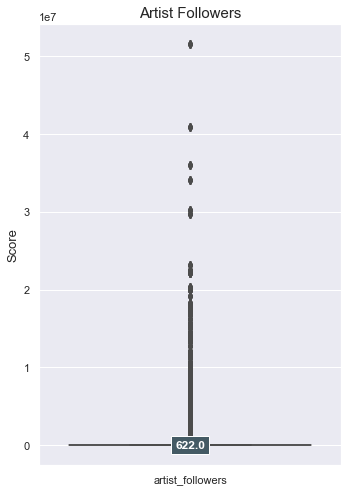

In [86]:
# Distribution boxplot
feature_boxplot('Artist Followers', songs[['artist_followers']])

### Artist Popularity

Mean Artist Popularity Score: 19.472
Median Artist Popularity Score: 17.0
STD of Artist Popularity Score: 17.176


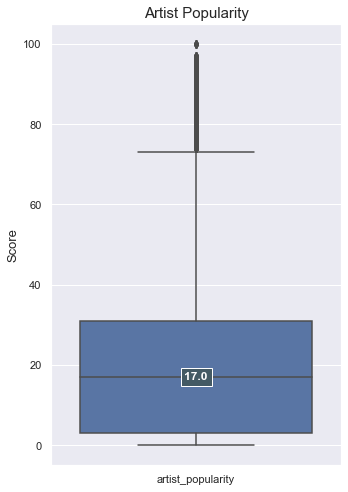

In [87]:
# Distribution boxplot
feature_boxplot('Artist Popularity', songs[['artist_popularity']])

### Track Popularity

Mean Track Popularity Score: 13.74
Median Track Popularity Score: 8.0
STD of Track Popularity Score: 15.186


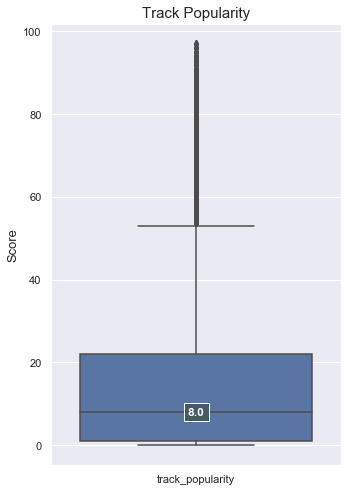

In [85]:
# Distribution boxplot
feature_boxplot('Track Popularity', songs[['track_popularity']])

### Track Release Year

Mean Track Release Year Score: 2011.023
Median Track Release Year Score: 2014.0
STD of Track Release Year Score: 9.197


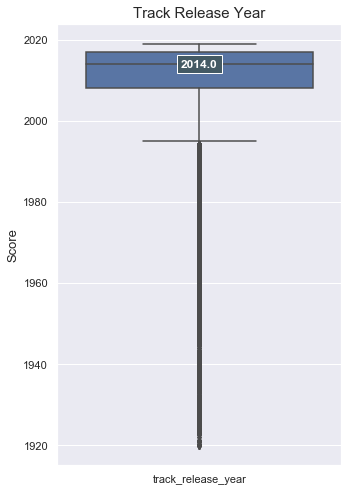

In [88]:
# Distribution boxplot
feature_boxplot('Track Release Year', songs[['track_release_year']])

### Acousticness

Mean Acousticness Score: 0.359
Median Acousticness Score: 0.216
STD of Acousticness Score: 0.36


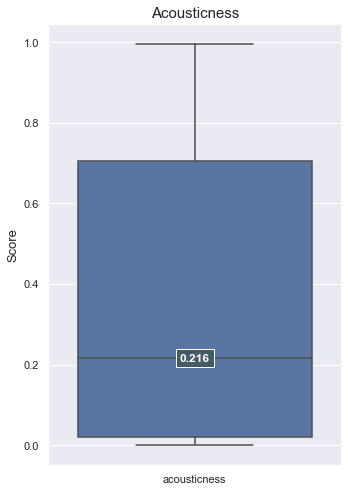

In [89]:
# Distribution boxplot
feature_boxplot('Acousticness', songs[['acousticness']])

### Danceability

Mean Danceability Score: 0.559
Median Danceability Score: 0.577
STD of Danceability Score: 0.188


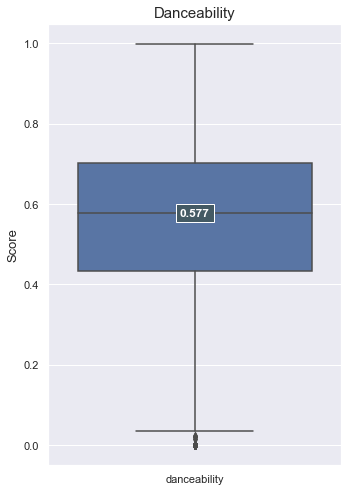

In [90]:
# Distribution boxplot
feature_boxplot('Danceability', songs[['danceability']])

### Duration

Mean Duration Score: 254480.602
Median Duration Score: 226320.0
STD of Duration Score: 162464.695


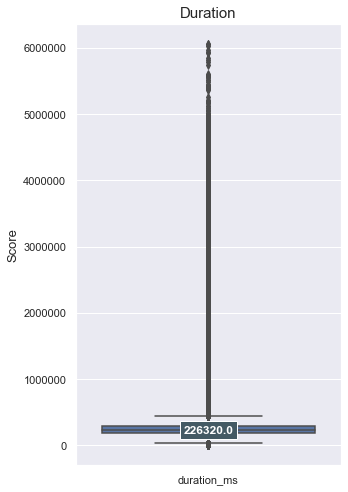

In [92]:
# Distribution boxplot
feature_boxplot('Duration', songs[['duration_ms']])

### Energy

Mean Energy Score: 0.58
Median Energy Score: 0.618
STD of Energy Score: 0.27


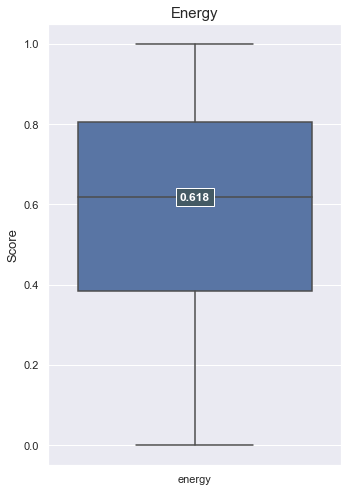

In [93]:
# Distribution boxplot
feature_boxplot('Energy', songs[['energy']])

### Instrumentalness

Mean Instrumentalness Score: 0.24
Median Instrumentalness Score: 0.001
STD of Instrumentalness Score: 0.359


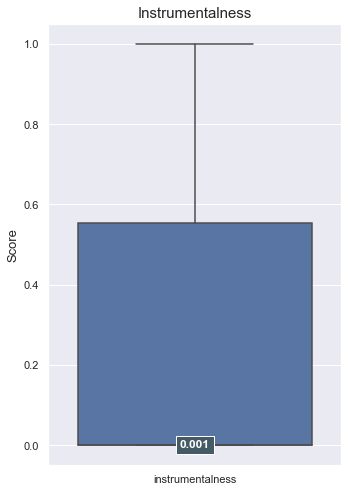

In [94]:
# Distribution boxplot
feature_boxplot('Instrumentalness', songs[['instrumentalness']])

### Liveness

Mean Liveness Score: 0.192
Median Liveness Score: 0.123
STD of Liveness Score: 0.164


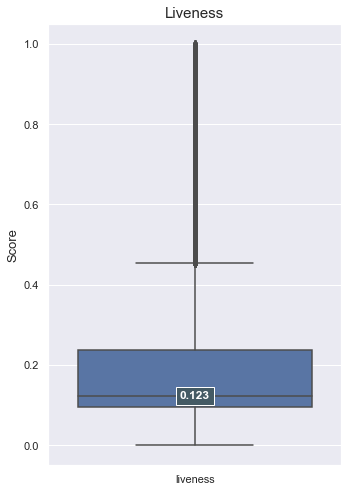

In [95]:
# Distribution boxplot
feature_boxplot('Liveness', songs[['liveness']])

### Loudness

Mean Loudness Score: -9.909
Median Loudness Score: -8.294
STD of Loudness Score: 5.874


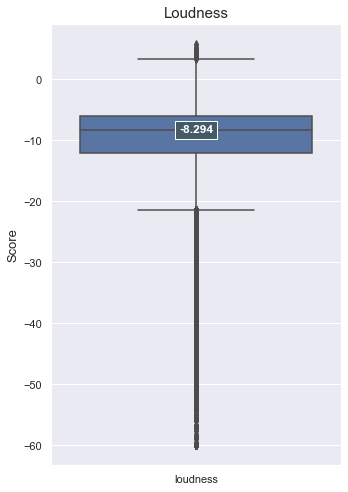

In [96]:
# Distribution boxplot
feature_boxplot('Loudness', songs[['loudness']])

### Speechiness

Mean Speechiness Score: 0.096
Median Speechiness Score: 0.049
STD of Speechiness Score: 0.123


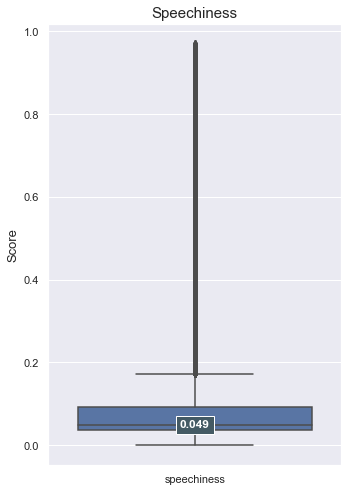

In [97]:
# Distribution boxplot
feature_boxplot('Speechiness', songs[['speechiness']])

### Tempo

Mean Tempo Score: 119.929
Median Tempo Score: 120.024
STD of Tempo Score: 29.534


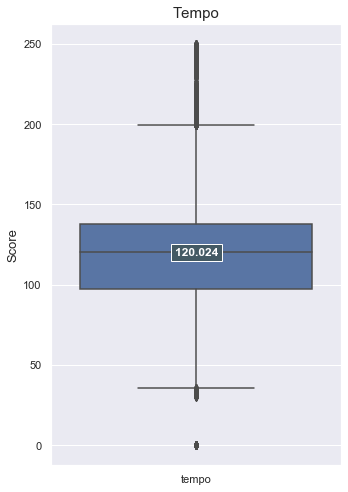

In [98]:
# Distribution boxplot
feature_boxplot('Tempo', songs[['tempo']])

### Valence

Mean Valence Score: 0.464
Median Valence Score: 0.451
STD of Valence Score: 0.268


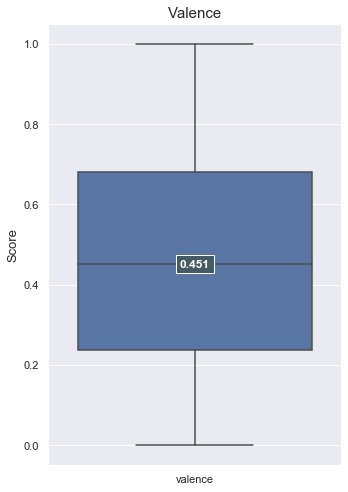

In [99]:
# Distribution boxplot
feature_boxplot('Valence', songs[['valence']])

## Artists EDA

In [2]:
# Read CSV to DataFrame
artists = pd.read_csv('Data/artists.csv')

In [3]:
print(artists.info())
artists.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285642 entries, 0 to 285641
Data columns (total 39 columns):
artist_id                    285642 non-null object
artist_followers             285642 non-null float64
artist_popularity            285642 non-null float64
track_popularity_mean        285642 non-null float64
track_popularity_median      285642 non-null float64
track_popularity_std         285642 non-null float64
track_release_year_mean      285642 non-null float64
track_release_year_median    285642 non-null float64
track_release_year_std       285642 non-null float64
acousticness_mean            285642 non-null float64
acousticness_median          285642 non-null float64
acousticness_std             285642 non-null float64
danceability_mean            285642 non-null float64
danceability_median          285642 non-null float64
danceability_std             285642 non-null float64
duration_ms_mean             285642 non-null float64
duration_ms_median           285642 non-nu

,artist_id,artist_followers,artist_popularity,track_popularity_mean,track_popularity_median,track_popularity_std,track_release_year_mean,track_release_year_median,track_release_year_std,acousticness_mean,acousticness_median,acousticness_std,danceability_mean,danceability_median,danceability_std,duration_ms_mean,duration_ms_median,duration_ms_std,energy_mean,energy_median,energy_std,instrumentalness_mean,instrumentalness_median,instrumentalness_std,liveness_mean,liveness_median,liveness_std,loudness_mean,loudness_median,loudness_std,speechiness_mean,speechiness_median,speechiness_std,tempo_mean,tempo_median,tempo_std,valence_mean,valence_median,valence_std
0,0001ZVMPt41Vwzt1zsmuzp,11327.0,11.0,19.5,19.5,2.121320,2017.5,2017.5,0.707107,0.206200,0.206200,0.241548,0.7570,0.7570,0.049497,223839.0,223839.0,6692.058577,0.75300,0.7530,0.002828,0.000359,0.000359,0.000373,0.15810,0.15810,0.111581,-4.9795,-4.9795,1.560585,0.04040,0.04040,0.012869,108.4635,108.4635,4.913685,0.73300,0.733,0.332340
1,0001wHqxbF2YYRQxGdbyER,3532.0,18.0,8.9,9.0,4.012481,2014.0,2015.0,2.108185,0.012644,0.001355,0.024116,0.6489,0.6415,0.056717,481528.1,478160.0,43893.760352,0.73060,0.7920,0.155317,0.807800,0.810000,0.073014,0.19576,0.11750,0.155194,-8.6983,-7.7255,2.617272,0.04290,0.04120,0.010319,126.7034,132.0050,11.915851,0.21437,0.180,0.152289
2,000Dq0VqTZpxOP6jQMscVL,3482.0,14.0,10.4,9.0,10.807405,2014.0,2014.0,1.000000,0.025614,0.014500,0.031576,0.6450,0.6520,0.029043,199780.8,196253.0,27694.143717,0.88040,0.9010,0.055694,0.006660,0.000000,0.014892,0.29640,0.32900,0.094614,-4.2056,-4.6680,1.129464,0.13080,0.05010,0.114962,158.6588,160.0360,10.963097,0.55840,0.605,0.264162
3,000ESzt0wlQI41YbKYGIkf,36.0,0.0,0.0,0.0,0.000000,2015.6,2014.0,2.065591,0.480650,0.523000,0.388906,0.5628,0.5440,0.171955,217349.5,216398.5,10805.481430,0.38932,0.4950,0.227478,0.015326,0.000000,0.048374,0.15210,0.09685,0.151020,-8.9797,-8.6720,1.977170,0.06714,0.04655,0.045628,112.6615,112.0185,19.636695,0.38670,0.405,0.129500
4,000NbZqISnuKaqmw33JxTV,445.0,9.0,17.0,17.0,0.000000,2018.0,2018.0,0.000000,0.995000,0.995000,0.000000,0.3190,0.3190,0.000000,103307.0,103307.0,0.000000,0.02340,0.0234,0.000000,0.710000,0.710000,0.000000,0.10600,0.10600,0.000000,-23.8090,-23.8090,0.000000,0.04500,0.04500,0.000000,69.3040,69.3040,0.000000,0.52500,0.525,0.000000


In [18]:
def mean_median_boxplot(feature, df):
    plt.figure(figsize=(5, 7))
    box_plot = sns.boxplot(x="variable", y="value", data=pd.melt(df))
    ax = box_plot.axes
    lines = ax.get_lines()
    categories = ax.get_xticks()
    for cat in categories:
        # every 4th line at the interval of 6 is median line
        # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
        y=round(lines[4+cat*6].get_ydata()[0], 3)
        ax.text(
            cat,
            y,
            f'{y}',
            ha='center',
            va='center',
            fontweight='bold',
            size=12,
            color='white',
            bbox=dict(facecolor='#445A64'))
    plt.title(feature, fontsize=15)
    plt.xlabel('', fontsize=13)
    plt.ylabel('Score', fontsize=13)
    box_plot.figure.tight_layout()
    print("Average Mean", feature, "Score:", round(df[df.columns[0]].mean(), 3))
    print("Average Median", feature, "Score:", round(df[df.columns[1]].mean(), 3))

In [21]:
def std_boxplot(feature, df):
    plt.figure(figsize=(5, 7))
    box_plot = sns.boxplot(x="variable", y="value", data=pd.melt(df))
    ax = box_plot.axes
    lines = ax.get_lines()
    categories = ax.get_xticks()
    for cat in categories:
        # every 4th line at the interval of 6 is median line
        # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
        y=round(lines[4+cat*6].get_ydata()[0], 3)
        ax.text(
            cat,
            y,
            f'{y}',
            ha='center',
            va='center',
            fontweight='bold',
            size=12,
            color='white',
            bbox=dict(facecolor='#445A64'))
    plt.title(feature, fontsize=15)
    plt.xlabel('', fontsize=13)
    plt.ylabel('Standard Deviation', fontsize=13)
    box_plot.figure.tight_layout()
    print("Average STD of", feature, "Score:", round(df[df.columns[0]].mean(), 3))

### Track Popularity

Average Mean Track Popularity Score: 12.994
Average Median Track Popularity Score: 12.079


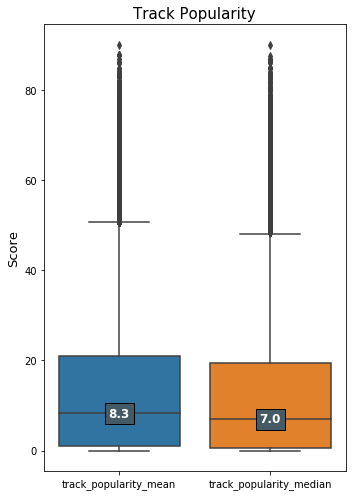

In [19]:
# Compare mean & median distributions
mean_median_boxplot('Track Popularity', artists[['track_popularity_mean','track_popularity_median']])


Average STD of Track Popularity Score: 4.119


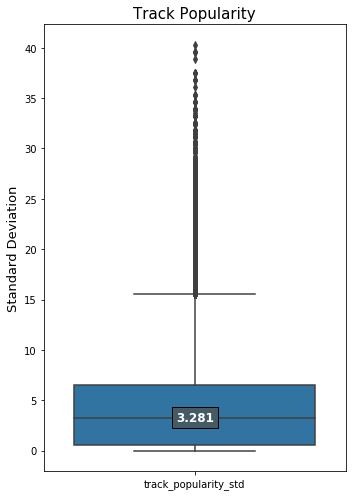

In [20]:
# Standard deviation distribution
std_boxplot('Track Popularity', artists[['track_popularity_std']])


### Track Release Year

Average Mean Release Year Score: 2011.014
Average Median Release Year Score: 2011.027


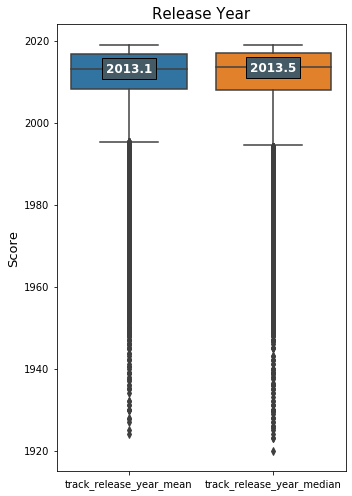

In [22]:
# Compare mean & median distributions
mean_median_boxplot('Track Release Year', artists[['track_release_year_mean','track_release_year_median']])


Average STD of Release Year Score: 2.263


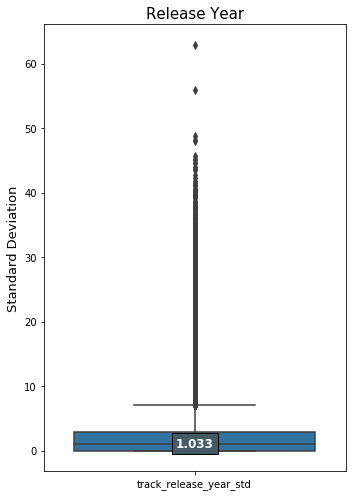

In [23]:
# Standard deviation distribution
std_boxplot('Track Release Year', artists[['track_release_year_std']])


### Acousticness

Average Mean Acousticness Score: 0.352
Average Median Acousticness Score: 0.337


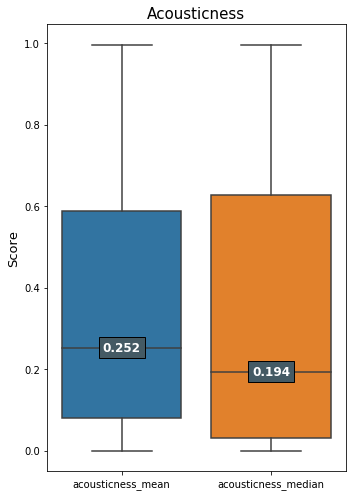

In [24]:
# Compare mean & median distributions
mean_median_boxplot('Acousticness', artists[['acousticness_mean','acousticness_median']])


Average STD of Acousticness Score: 0.142


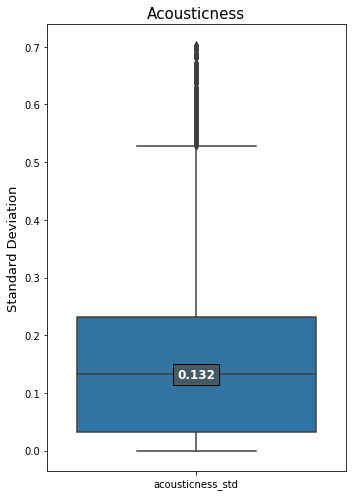

In [25]:
# Standard deviation distribution
std_boxplot('Acousticness', artists[['acousticness_std']])


### Danceability

Average Mean Danceability Score: 0.565
Average Median Danceability Score: 0.569


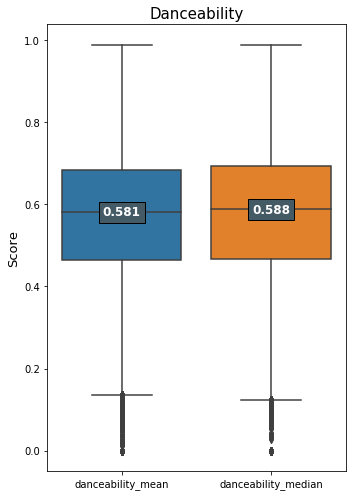

In [26]:
# Compare mean & median distributions
mean_median_boxplot('Danceability', artists[['danceability_mean','danceability_median']])


Average STD of Danceability Score: 0.097


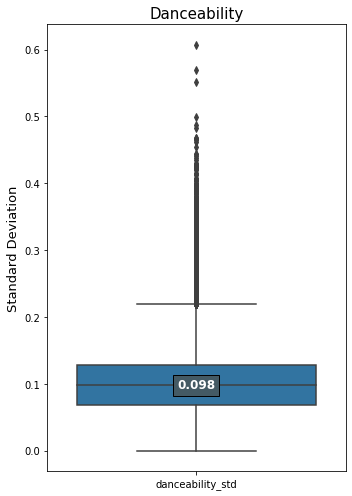

In [27]:
# Standard deviation distribution
std_boxplot('Danceability', artists[['danceability_std']])


### Duration

Average Mean Duration Score: 254700.369
Average Median Duration Score: 247405.547


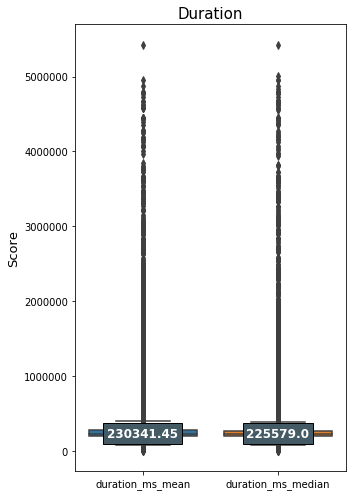

In [28]:
# Compare mean & median distributions
mean_median_boxplot('Duration', artists[['duration_ms_mean','duration_ms_median']])


Average STD of Duration Score: 62838.857


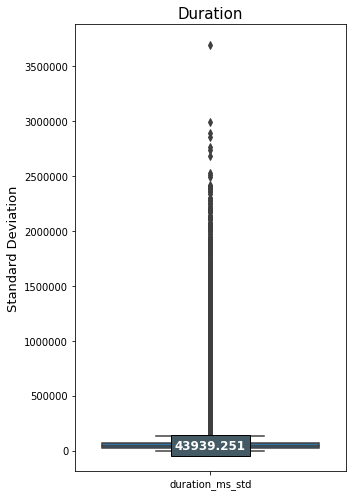

In [29]:
# Standard deviation distribution
std_boxplot('Duration', artists[['duration_ms_std']])


### Energy

Average Mean Energy Score: 0.585
Average Median Energy Score: 0.589


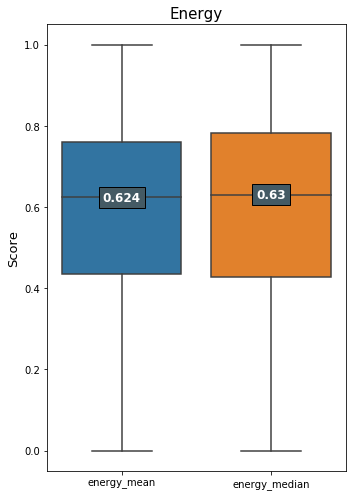

In [30]:
# Compare mean & median distributions
mean_median_boxplot('Energy', artists[['energy_mean','energy_median']])


Average STD of Energy Score: 0.119


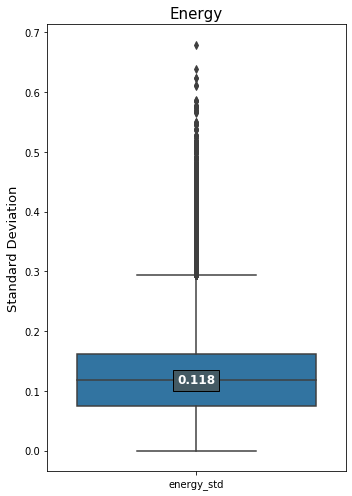

In [31]:
# Standard deviation distribution
std_boxplot('Energy', artists[['energy_std']])


### Instrumentalness

Average Mean Instrumentalness Score: 0.242
Average Median Instrumentalness Score: 0.23


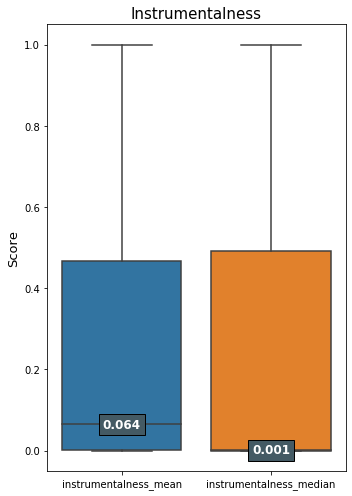

In [32]:
# Compare mean & median distributions
mean_median_boxplot('Instrumentalness', artists[['instrumentalness_mean','instrumentalness_median']])


Average STD of Instrumentalness Score: 0.131


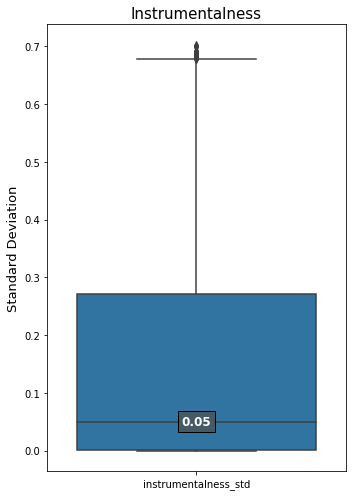

In [33]:
# Standard deviation distribution
std_boxplot('Instrumentalness', artists[['instrumentalness_std']])


### Liveness

Average Mean Liveness Score: 0.192
Average Median Liveness Score: 0.162


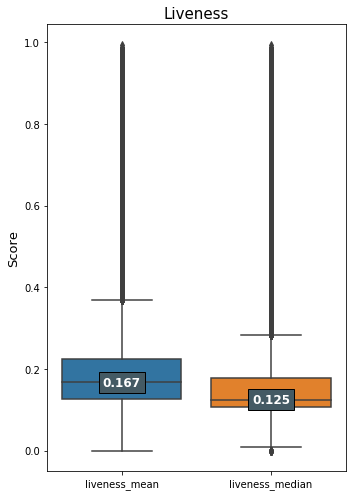

In [34]:
# Compare mean & median distributions
mean_median_boxplot('Liveness', artists[['liveness_mean','liveness_median']])


Average STD of Liveness Score: 0.111


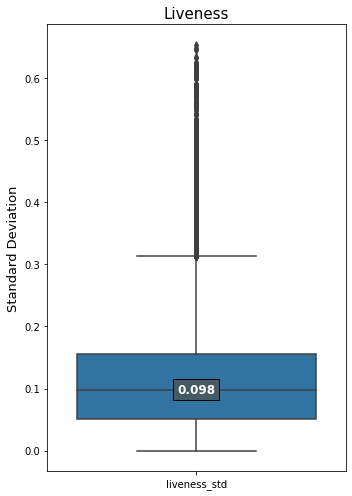

In [35]:
# Standard deviation distribution
std_boxplot('Liveness', artists[['liveness_std']])


### Loudness

Average Mean Loudness Score: -9.831
Average Median Loudness Score: -9.634


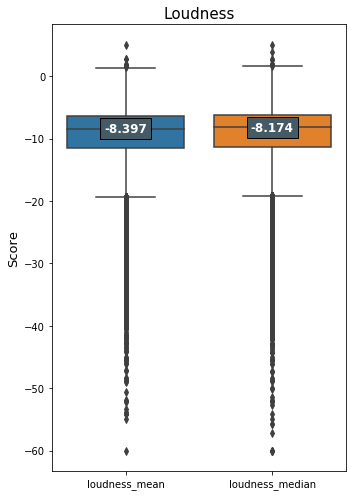

In [36]:
# Compare mean & median distributions
mean_median_boxplot('Loudness', artists[['loudness_mean','loudness_median']])


Average STD of Loudness Score: 2.174


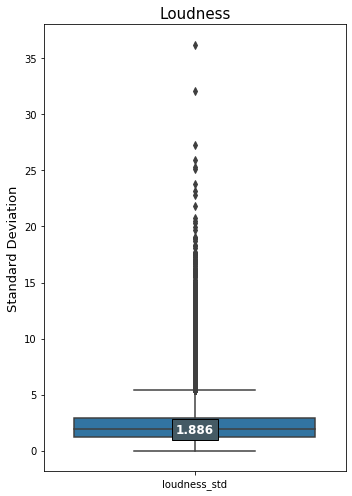

In [37]:
# Standard deviation distribution
std_boxplot('Loudness', artists[['loudness_std']])


### Speechiness

Average Mean Speechiness Score: 0.097
Average Median Speechiness Score: 0.087


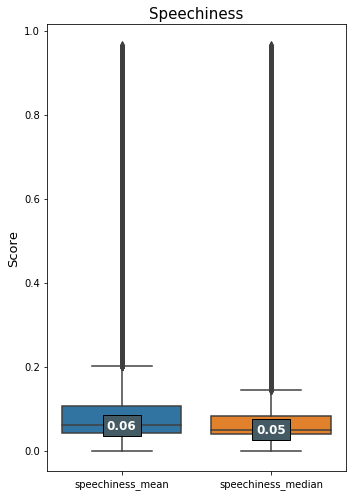

In [38]:
# Compare mean & median distributions
mean_median_boxplot('Speechiness', artists[['speechiness_mean','speechiness_median']])


Average STD of Speechiness Score: 0.046


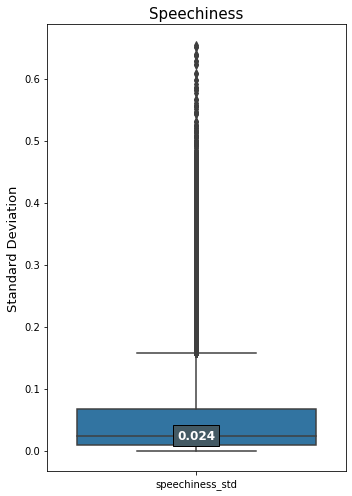

In [39]:
# Standard deviation distribution
std_boxplot('Speechiness', artists[['speechiness_std']])


### Tempo

Average Mean Tempo Score: 120.14
Average Median Tempo Score: 118.441


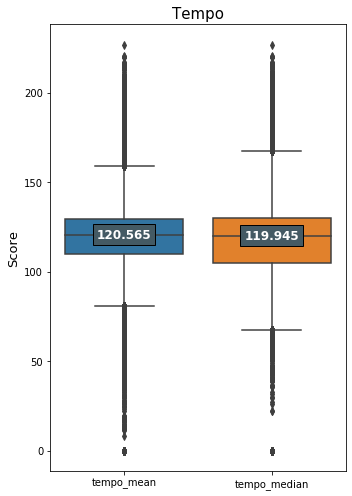

In [40]:
# Compare mean & median distributions
mean_median_boxplot('Tempo', artists[['tempo_mean','tempo_median']])


Average STD of Tempo Score: 22.468


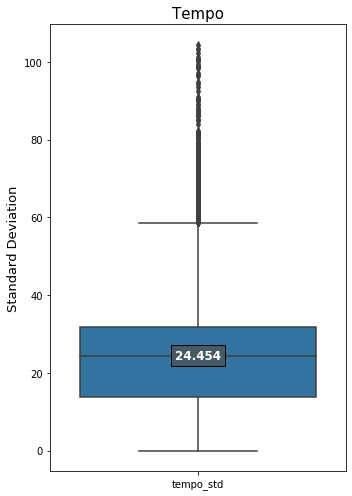

In [41]:
# Standard deviation distribution
std_boxplot('Tempo', artists[['tempo_std']])


### Valence

Average Mean Valence Score: 0.467
Average Median Valence Score: 0.463


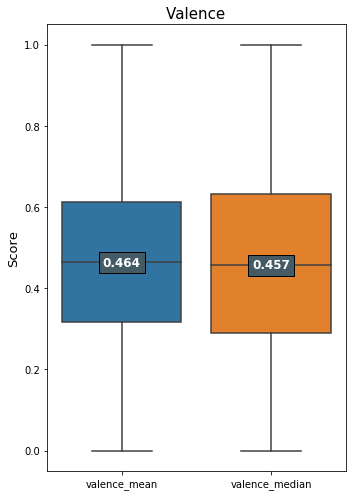

In [42]:
# Compare mean & median distributions
mean_median_boxplot('Valence', artists[['valence_mean','valence_median']])


Average STD of Valence Score: 0.161


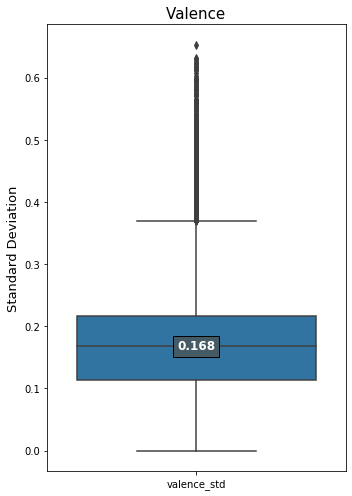

In [43]:
# Standard deviation distribution
std_boxplot('Valence', artists[['valence_std']])


# Artists > Artists2

In [38]:
# Read CSV to DataFrame
artists = pd.read_csv('Data/artists.csv')

In [39]:
# Drop median columns
artists.drop(columns=['track_popularity_median', 
                      'track_release_year_median', 
                      'acousticness_median', 
                      'danceability_median',
                      'duration_ms_median',
                      'energy_median',
                      'instrumentalness_median',
                      'liveness_median',
                      'loudness_median',
                      'speechiness_median',
                      'tempo_median',
                      'valence_median'
                     ], inplace=True)

In [40]:
print(artists.info())
artists.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285659 entries, 0 to 285658
Data columns (total 28 columns):
artist_id                  285659 non-null object
artist_name                281928 non-null object
artist_followers           285659 non-null float64
artist_popularity          285659 non-null float64
track_popularity_mean      285659 non-null float64
track_popularity_std       285659 non-null float64
track_release_year_mean    285659 non-null float64
track_release_year_std     285659 non-null float64
acousticness_mean          285659 non-null float64
acousticness_std           285659 non-null float64
danceability_mean          285659 non-null float64
danceability_std           285659 non-null float64
duration_ms_mean           285659 non-null float64
duration_ms_std            285659 non-null float64
energy_mean                285659 non-null float64
energy_std                 285659 non-null float64
instrumentalness_mean      285659 non-null float64
instrumentalness_std    

,artist_id,artist_name,artist_followers,artist_popularity,track_popularity_mean,track_popularity_std,track_release_year_mean,track_release_year_std,acousticness_mean,acousticness_std,danceability_mean,danceability_std,duration_ms_mean,duration_ms_std,energy_mean,energy_std,instrumentalness_mean,instrumentalness_std,liveness_mean,liveness_std,loudness_mean,loudness_std,speechiness_mean,speechiness_std,tempo_mean,tempo_std,valence_mean,valence_std
0,0001ZVMPt41Vwzt1zsmuzp,Thyro & Yumi,11327.0,11.0,19.5,2.121320,2017.5,0.707107,0.206200,0.241548,0.7570,0.049497,223839.0,6692.058577,0.75300,0.002828,0.000359,0.000373,0.15810,0.111581,-4.9795,1.560585,0.04040,0.012869,108.4635,4.913685,0.73300,0.332340
1,0001wHqxbF2YYRQxGdbyER,Motion Drive,3532.0,18.0,8.9,4.012481,2014.0,2.108185,0.012644,0.024116,0.6489,0.056717,481528.1,43893.760352,0.73060,0.155317,0.807800,0.073014,0.19576,0.155194,-8.6983,2.617272,0.04290,0.010319,126.7034,11.915851,0.21437,0.152289
2,000Dq0VqTZpxOP6jQMscVL,Thug Brothers,3482.0,14.0,10.4,10.807405,2014.0,1.000000,0.025614,0.031576,0.6450,0.029043,199780.8,27694.143717,0.88040,0.055694,0.006660,0.014892,0.29640,0.094614,-4.2056,1.129464,0.13080,0.114962,158.6588,10.963097,0.55840,0.264162
3,000ESzt0wlQI41YbKYGIkf,Zach Russell,36.0,0.0,0.0,0.000000,2015.6,2.065591,0.480650,0.388906,0.5628,0.171955,217349.5,10805.481430,0.38932,0.227478,0.015326,0.048374,0.15210,0.151020,-8.9797,1.977170,0.06714,0.045628,112.6615,19.636695,0.38670,0.129500
4,000NbZqISnuKaqmw33JxTV,Carlos Nakai,445.0,9.0,17.0,0.000000,2018.0,0.000000,0.995000,0.000000,0.3190,0.000000,103307.0,0.000000,0.02340,0.000000,0.710000,0.000000,0.10600,0.000000,-23.8090,0.000000,0.04500,0.000000,69.3040,0.000000,0.52500,0.000000


In [41]:
# Export to CSV
artists.to_csv("Data/artists2.csv")

# Train-Validation-Test Split

## Songs Train-Test Split

In [42]:
# Read CSV to DataFrame
songs = pd.read_csv('Data/songs.csv')

In [43]:
# Train-Test Split
from sklearn.model_selection import train_test_split

songs_train, songs_test_final = train_test_split(songs, test_size=0.15)
songs_train, songs_test = train_test_split(songs_train, test_size=0.2)

print("Songs Train Set Size:", len(songs_train))
print("Songs Test Set Size:", len(songs_test))
print("Songs Test Final Set Size:", len(songs_test_final))

Songs Train Set Size: 1635118
Songs Test Set Size: 408780
Songs Test Final Set Size: 360689


In [44]:
# Export to CSV
songs_train.to_csv("Data/songs_train.csv")
songs_test.to_csv("Data/songs_test.csv")
songs_test_final.to_csv("Data/songs_test_final.csv")

## Artists Train-Test Split

In [45]:
# Read CSV to DataFrame
artists = pd.read_csv('Data/artists2.csv')

In [46]:
# Train-Test Split
from sklearn.model_selection import train_test_split

artists_train, artists_test_final = train_test_split(artists, test_size=0.15)
artists_train, artists_test = train_test_split(artists_train, test_size=0.2)

print("Artists Train Set Size:", len(artists_train))
print("Artists Test Set Size:", len(artists_test))
print("Artists Test Final Set Size:", len(artists_test_final))

Artists Train Set Size: 194248
Artists Test Set Size: 48562
Artists Test Final Set Size: 42849


In [47]:
# Export to CSV
artists_train.to_csv("Data/artists_train.csv")
artists_test.to_csv("Data/artists_test.csv")
artists_test_final.to_csv("Data/artists_test_final.csv")